###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot
np.random.seed(1337)
random.seed(1337)

In [2]:
# loss function
def loss(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


#### Neuron

neuron nonlin is  False
number of inputs:  1
Neuron:  LinearNeuron(1)
weights:  [Value(name=val1,type=w,data=0.23550571390294128, grad=0)]
b:  Value(name=val2,type=b,data=0, grad=0)
b type:  b
number of parameters  2
[Value(name=val1,type=w,data=0.23550571390294128, grad=0), Value(name=val2,type=b,data=0, grad=0)]
inputs  [Value(name=val3,type=i,data=1, grad=0)]
targets  [8]
number of Value objects created =  5
activation:  Value(name=val5,type=a,data=0.23550571390294128, grad=0)


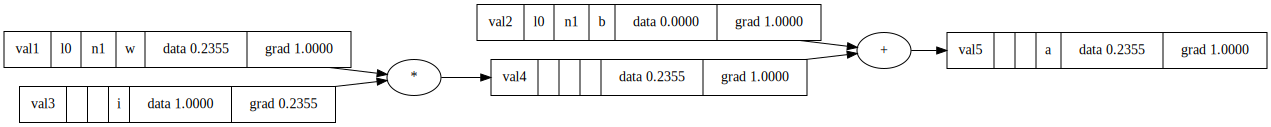

In [3]:
nin=1  #number of inputs
nout=1  #number of outputs

Value.value_counter=0
Neuron.neuron_counter=0

myNeuron=Neuron(nin,0,nonlin=False)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b type: ",myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xi = [Value(x,type='i') for x in xinumbers]
print("inputs ", xi)

xtarget= np.random.randint(1,10, size=(nout))   # targets
print("targets ", xtarget)


#loss_Neuron=loss(myNeuron(xi),xtarget)
activation=myNeuron(xi)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
activation.backward()
draw_dot(activation)

## Gradient

neuron nonlin is  False
neuron nonlin is  False
inputs  [Value(name=val11,type=i,data=1, grad=0), Value(name=val12,type=i,data=2, grad=0), Value(name=val13,type=i,data=3, grad=0)]
number of Value objects created =  26
loss= Value(name=val26,type=,data=-0.0030763670941793154, grad=0)


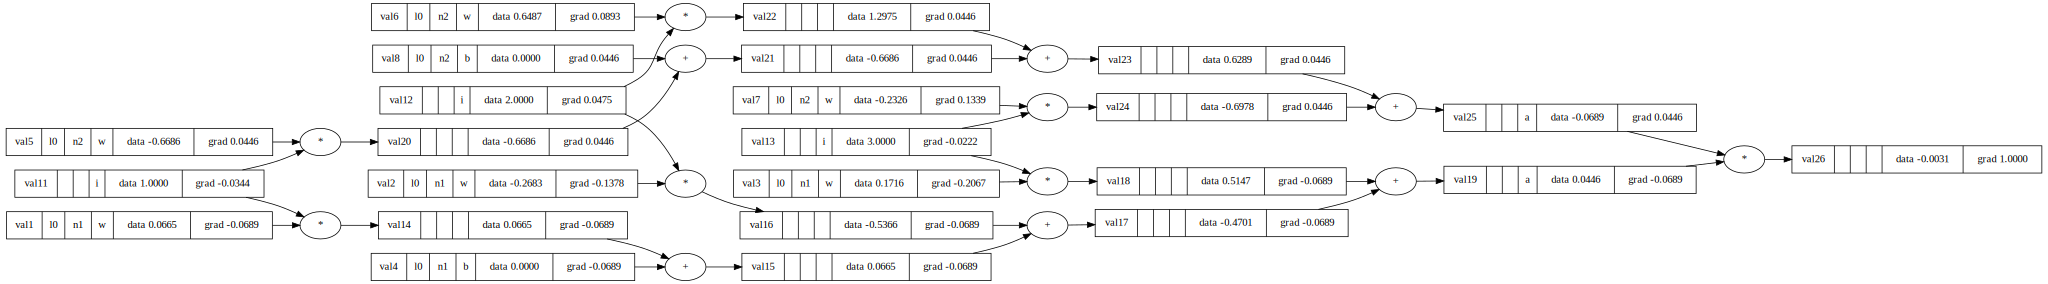

In [4]:
nin = 3  # number of inputs
Value.value_counter = 0
Neuron.neuron_counter = 0

myNeuron1 = Neuron(nin, 0, nonlin=False)
myNeuron2 = Neuron(nin, 0, nonlin=False)

input1 = [Value(1.0, type="i")]
input2 = [Value(1.0, type="i")]

xinumbers = list(range(1, nin + 1))
xi = [Value(x, type="i") for x in xinumbers]
print("inputs ", xi)

# loss = myNeuron1(input1) * myNeuron2(input2)
loss = myNeuron1(xi) * myNeuron2(xi)
print("number of Value objects created = ", Value.value_counter)

print("loss=", loss)

loss.backward()

draw_dot(loss)